In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2367]:
df = pd.read_csv('cleaned_ds_glassdoor_jobs.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,NumPy,Scipy,Pytorch,Xml,PowerBI,Bokeh,Github,Docker,Scikit,NLP
0,Data Scientist,108145,"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Public,...,0,0,0,0,0,0,0,0,0,0
1,Data Scientist,108145,Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Private,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,108145,GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary of Private Company,...,0,0,0,0,0,0,0,0,0,0
3,Data Scientist,108145,*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,108145,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Private,...,0,0,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dfd2828>,
      dtype=object)

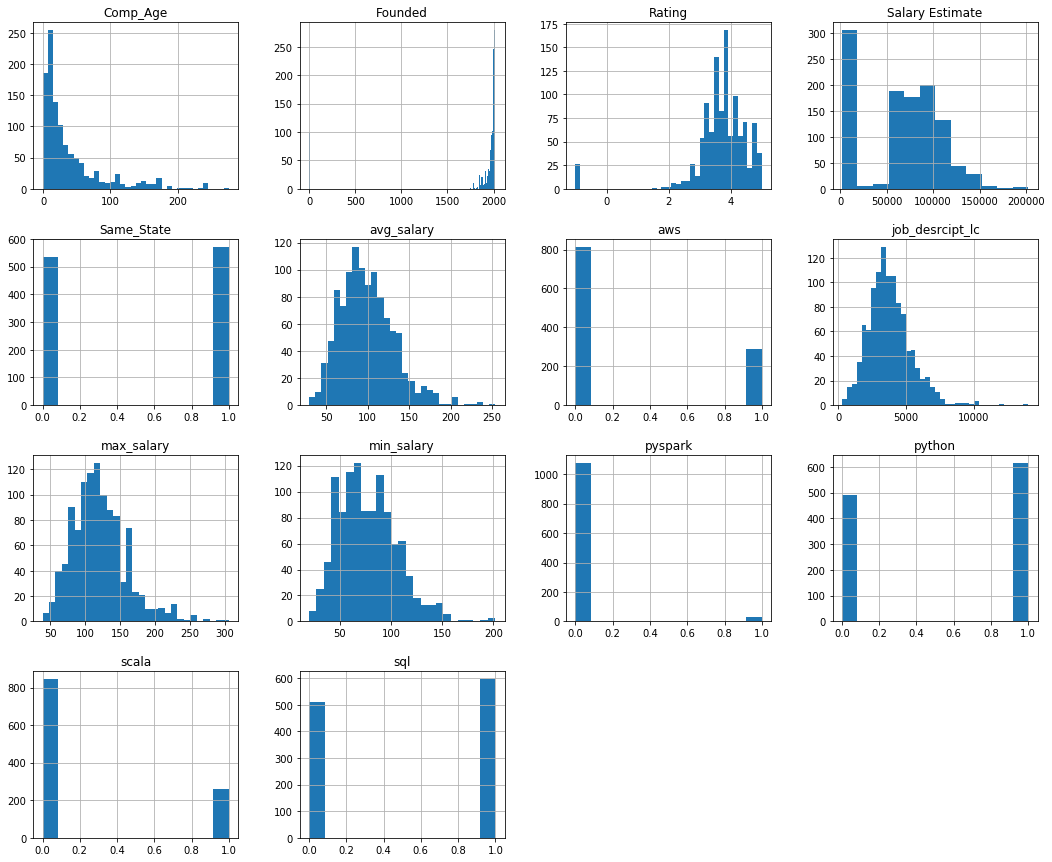

In [6]:
df.hist(figsize=(18,15), bins='auto')

In [7]:
abs(df.corr()) > 0.75

,Salary Estimate,Rating,Founded,min_salary,max_salary,avg_salary,Same_State,Comp_Age,job_desrcipt_lc,python,sql,aws,scala,pyspark
Salary Estimate,True,False,False,True,True,True,False,False,False,False,False,False,False,False
Rating,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Founded,False,False,True,False,False,False,False,False,False,False,False,False,False,False
min_salary,True,False,False,True,True,True,False,False,False,False,False,False,False,False
max_salary,True,False,False,True,True,True,False,False,False,False,False,False,False,False
avg_salary,True,False,False,True,True,True,False,False,False,False,False,False,False,False
Same_State,False,False,False,False,False,False,True,False,False,False,False,False,False,False
Comp_Age,False,False,False,False,False,False,False,True,False,False,False,False,False,False
job_desrcipt_lc,False,False,False,False,False,False,False,False,True,False,False,False,False,False
python,False,False,False,False,False,False,False,False,False,True,False,False,False,False


^^^Above can see no multicollinearity. Only high correlation between salary estimate and min_salary, max_salary, avg_salary, which is expected. Avg_salary will only be used because its the target variable

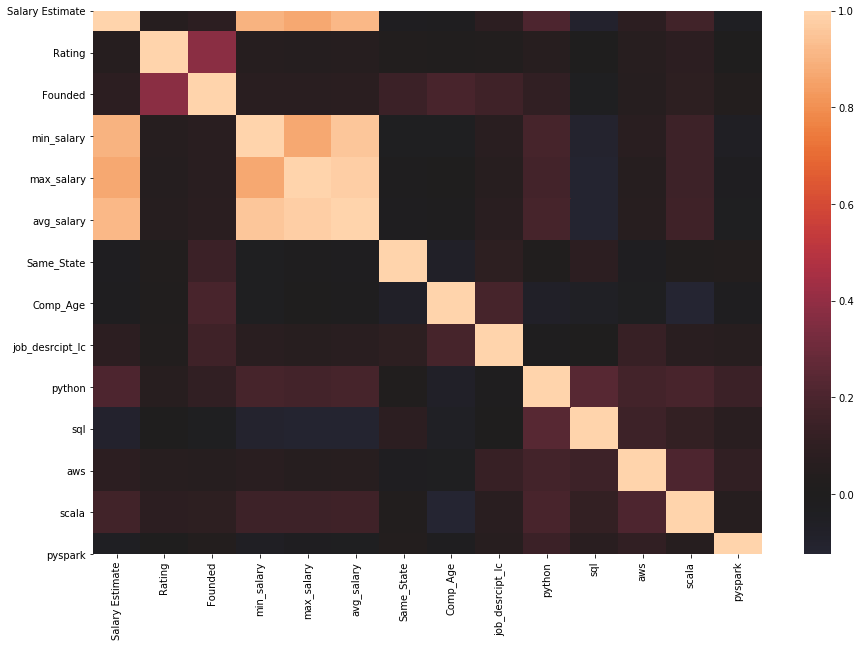

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), center=0)

### Bar Charts of Features vs Target(avg_salary)

In [34]:
df_columns = df[['Rating','Size', 'Type of ownership','Sector','Revenue','avg_salary','State','Same_State','Comp_Age','job_title','Seniority','job_descript_lc','python','sql','aws','scala','pyspark']]

#####  Company Size vs Average Salary

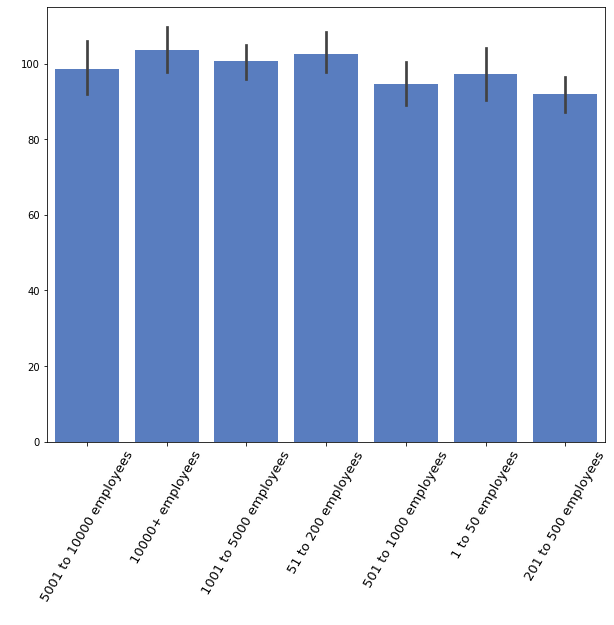

In [2375]:
plt.figure(figsize = (10,8))

sns.set_color_codes("muted")
chart = sns.barplot(data=df, x='Size', y='avg_salary', color = 'b')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, fontsize =13)
chart.set_xlabel(' ')
chart.set_ylabel(' ')
# chart.set_xlabel('Company Size (Employees)', fontsize =15)
# chart.set_ylabel('Average Salary', fontsize =15)
# chart.set_title('Company Size(Employees) Vs Average Salary', fontsize =20)
plt.show()

##### Type of Ownership vs Average Salary

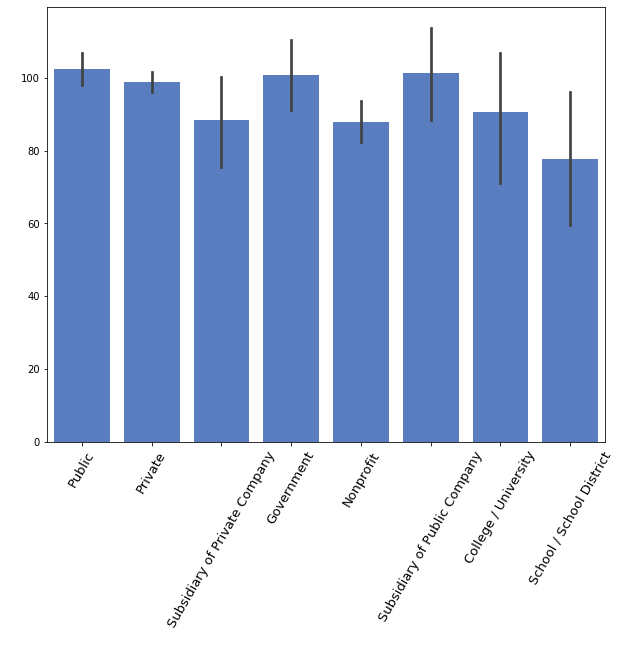

In [2378]:
plt.figure(figsize = (10,8))
chart = sns.barplot(data=df, x='Type of ownership', y='avg_salary', color = 'b')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, fontsize =13)
chart.set_xlabel(' ')
chart.set_ylabel(' ')
# chart.set_xlabel('Type of Ownership', fontsize =15)
# chart.set_ylabel('Average Salary', fontsize =15)
# chart.set_title('Type of Ownership Vs Average Salary', fontsize =20)
plt.show()

##### Sector vs Average Salary

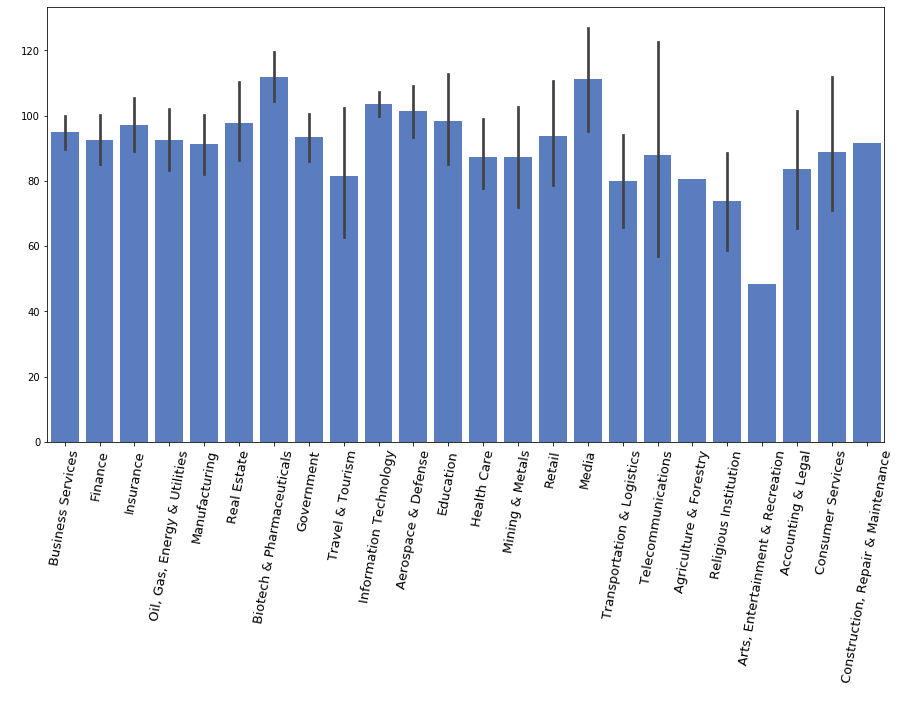

In [2380]:
plt.figure(figsize = (15,8))
chart = sns.barplot(data=df, x='Sector', y='avg_salary', color = 'b')
chart.set_xticklabels(chart.get_xticklabels(), rotation=80, fontsize =13)
chart.set_xlabel(' ')
chart.set_ylabel(' ')
# chart.set_xlabel('Sector', fontsize =15)
# chart.set_ylabel('Average Salary', fontsize =15)
# chart.set_title('Sector Vs Average Salary', fontsize =20)
plt.show()

##### Revenue vs Average Salary

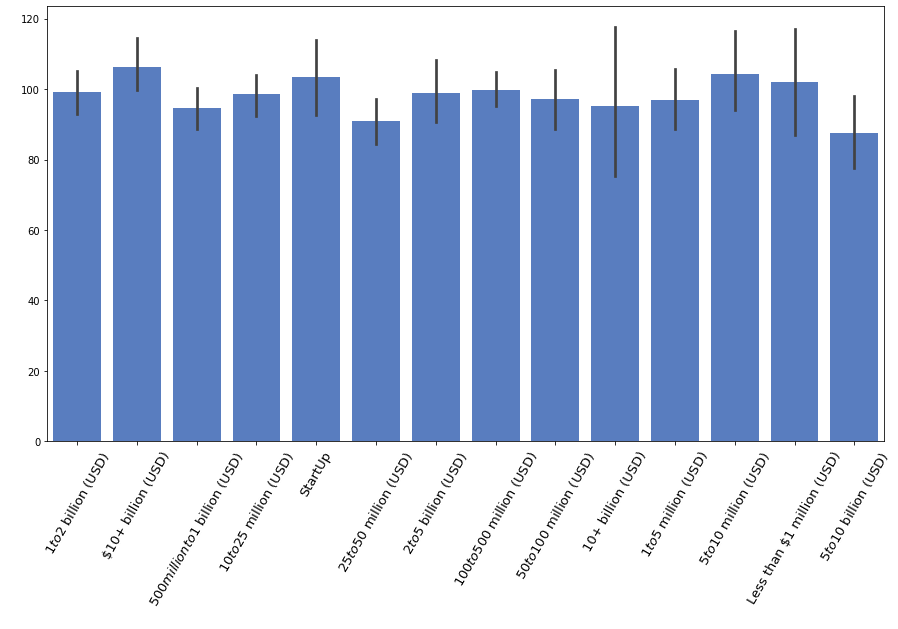

In [2381]:
plt.figure(figsize = (15,8))
chart = sns.barplot(data=df, x='Revenue', y='avg_salary', color = 'b')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, fontsize =13)
chart.set_xlabel(' ')
chart.set_ylabel(' ')
# chart.set_xlabel('Company Revenue', fontsize =15)
# chart.set_ylabel('Average Salary', fontsize =15)
# chart.set_title('Company Revenue Vs Average Salary', fontsize =20)
plt.show()

##### State vs Average Salary

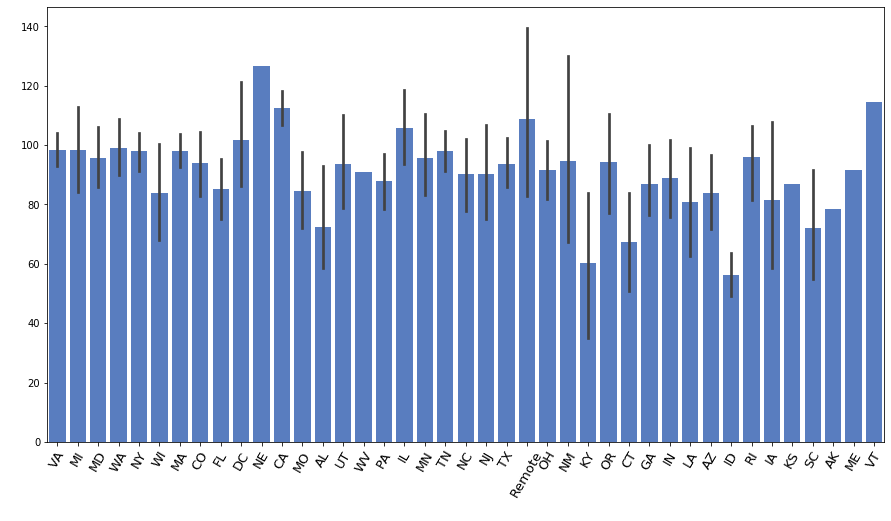

In [2382]:
plt.figure(figsize = (15,8))
chart = sns.barplot(data=df, x='State', y='avg_salary', color = 'b')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, fontsize =13)
chart.set_xlabel(' ')
chart.set_ylabel(' ')
# chart.set_xlabel('State', fontsize =15)
# chart.set_ylabel('Average Salary', fontsize =15)
# chart.set_title('State Vs Average Salary', fontsize =20)
plt.show()

##### Same State vs Average Salary

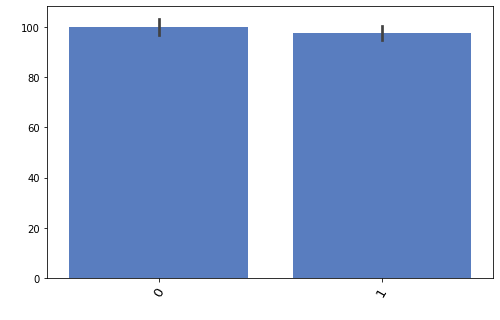

In [2383]:
plt.figure(figsize = (8,5))
chart = sns.barplot(data=df, x='Same_State', y='avg_salary', color = 'b')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, fontsize =13)
chart.set_xlabel(' ')
chart.set_ylabel(' ')
# chart.set_xlabel('Same State', fontsize =15)
# chart.set_ylabel('Average Salary', fontsize =15)
# chart.set_title('Same State Vs Average Salary', fontsize =20)
plt.show()

##### Job Title vs Average Salary

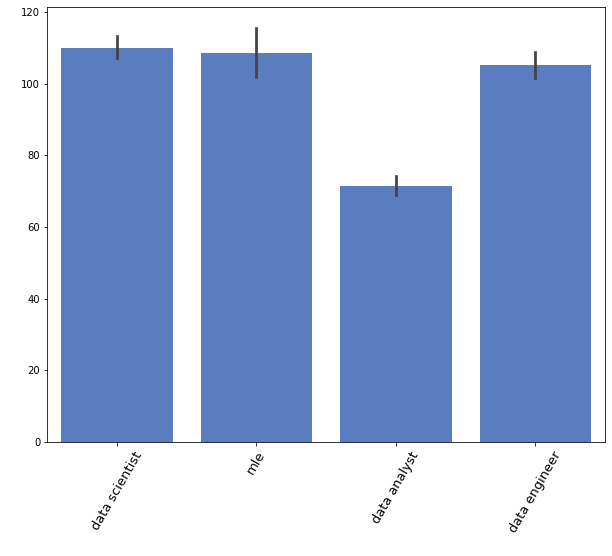

In [2384]:
plt.figure(figsize = (10,8))
chart = sns.barplot(data=df, x='job_title', y='avg_salary', color = 'b')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, fontsize =13)
chart.set_xlabel(' ')
chart.set_ylabel(' ')
# chart.set_xlabel('Job Title', fontsize =15)
# chart.set_ylabel('Average Salary', fontsize =15)
# chart.set_title('Job Title Vs Average Salary', fontsize =20)
plt.show()

##### Years of Experience vs Average Salary

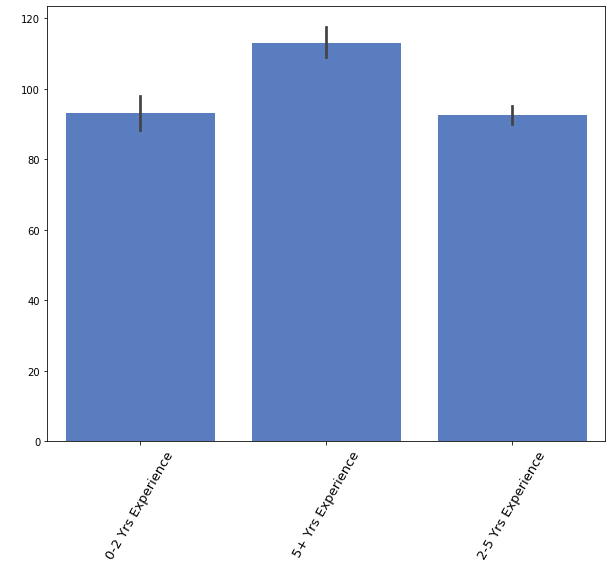

In [2390]:
plt.figure(figsize = (10,8))
chart = sns.barplot(data=df, x='Seniority', y='avg_salary', color = 'b')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, fontsize =13)
chart.set_xlabel(' ')
chart.set_ylabel(' ')
# chart.set_xlabel('Years of Experience', fontsize =15)
# chart.set_ylabel('Average Salary', fontsize =15)
# chart.set_title('Years of Experience Vs Average Salary', fontsize =20)
plt.show()

##### International_HQ vs Average Salary 

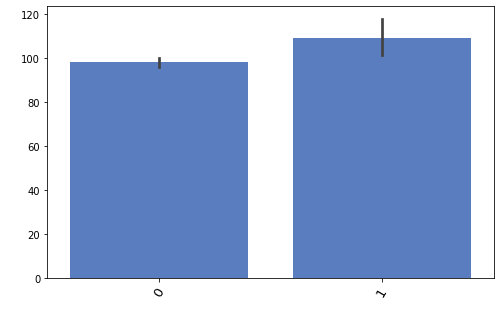

In [2387]:
plt.figure(figsize = (8,5))
chart = sns.barplot(data=df, x='International_HQ', y='avg_salary', color = 'b')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, fontsize =13)
chart.set_xlabel(' ')
chart.set_ylabel(' ')
# chart.set_xlabel('International Headquarters', fontsize =15)
# chart.set_ylabel('Average Salary', fontsize =15)
# chart.set_title('International Headquarters Vs Average Salary', fontsize =20)
plt.show()

### Features Value Counts

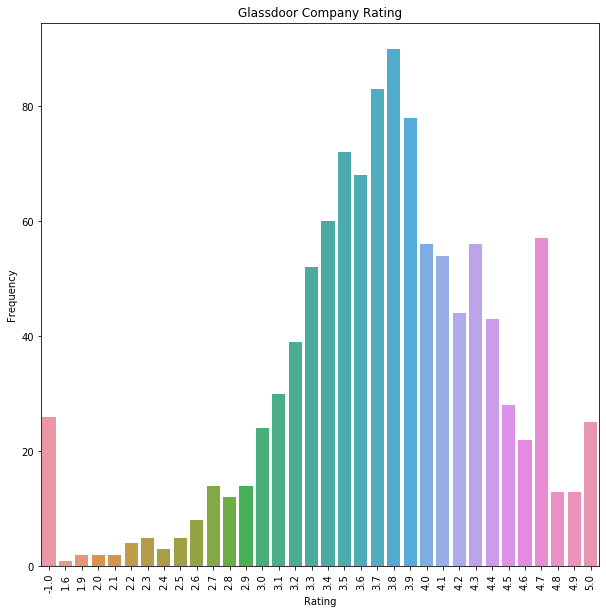

In [43]:
plt.figure(figsize = (10,10))
y = df['Rating'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Rating', ylabel = 'Frequency')
chart.set_title('Glassdoor Company Rating')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

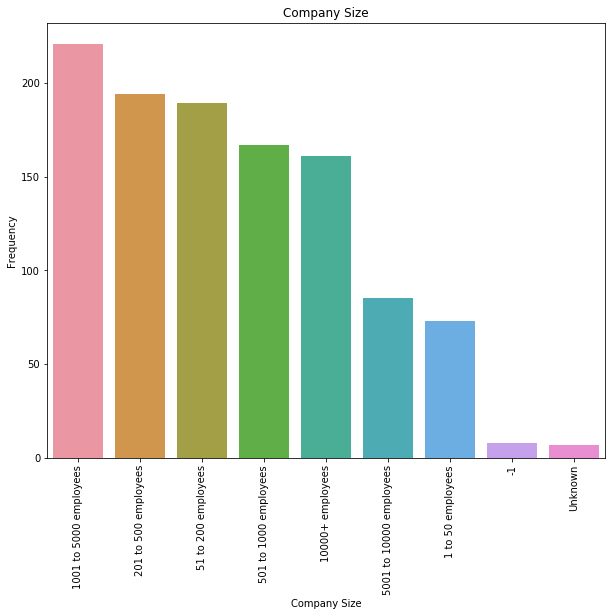

In [66]:
plt.figure(figsize = (10,8))
y = df['Size'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Company Size', ylabel = 'Frequency')
chart.set_title('Company Size')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

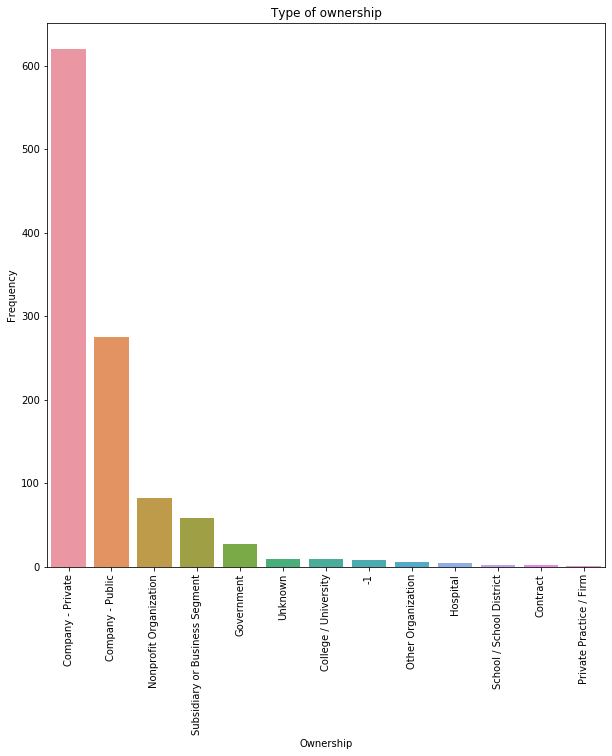

In [45]:
plt.figure(figsize = (10,10))
y = df['Type of ownership'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Ownership', ylabel = 'Frequency')
chart.set_title('Type of ownership')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

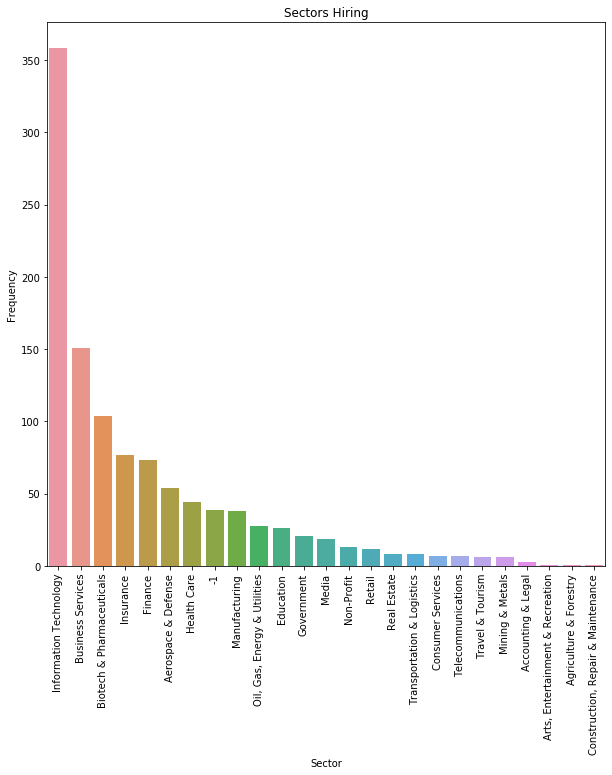

In [46]:
plt.figure(figsize = (10,10))
y = df['Sector'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Sector', ylabel = 'Frequency')
chart.set_title('Sectors Hiring')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

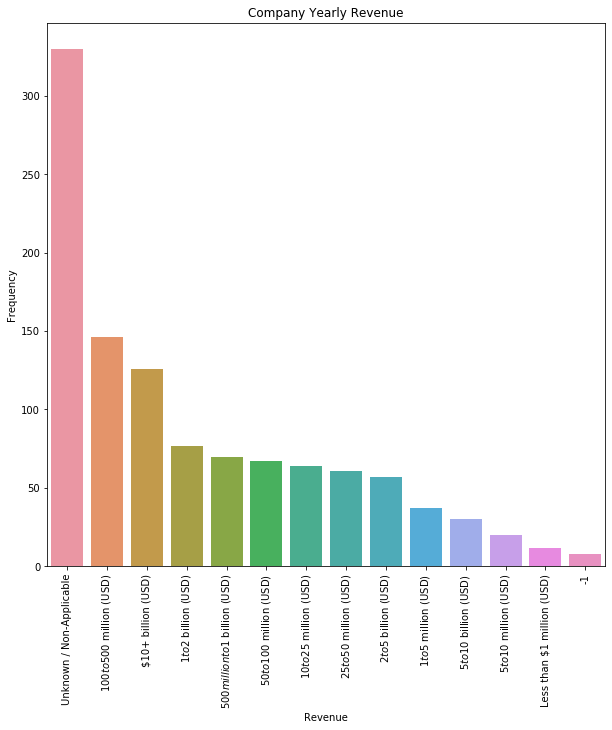

In [47]:
plt.figure(figsize = (10,10))
y = df['Revenue'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Revenue', ylabel = 'Frequency')
chart.set_title('Company Yearly Revenue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

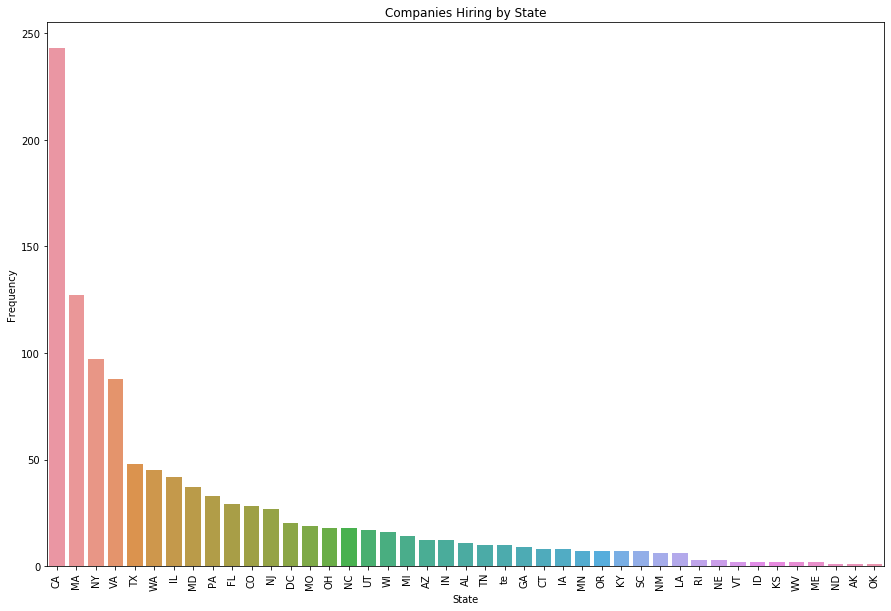

In [49]:
plt.figure(figsize = (15,10))
y = df['State'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='State', ylabel = 'Frequency')
chart.set_title('Companies Hiring by State')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

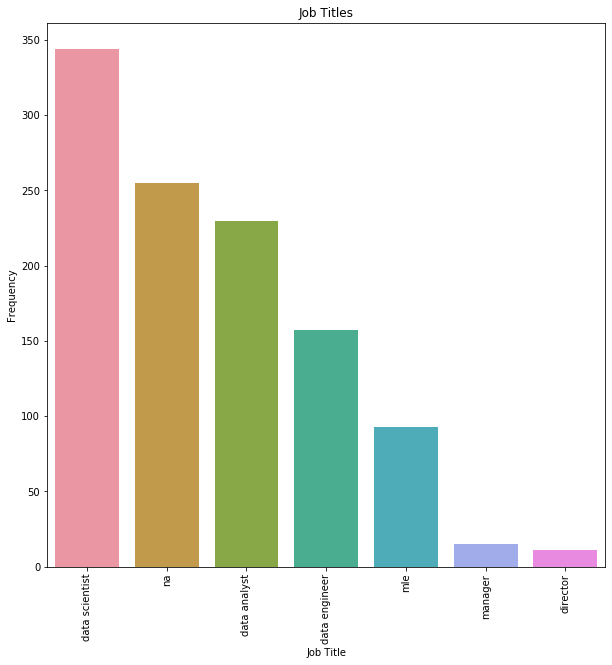

In [50]:
plt.figure(figsize = (10,10))
y = df['job_title'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Job Title', ylabel = 'Frequency')
chart.set_title('Job Titles')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

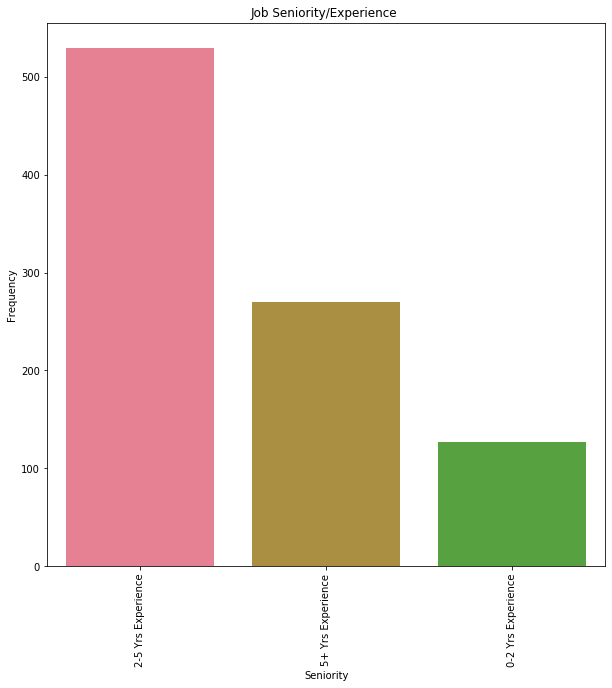

In [2366]:
plt.figure(figsize = (10,10))
y = df['Seniority'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Seniority', ylabel = 'Frequency')
chart.set_title('Job Seniority/Experience ')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

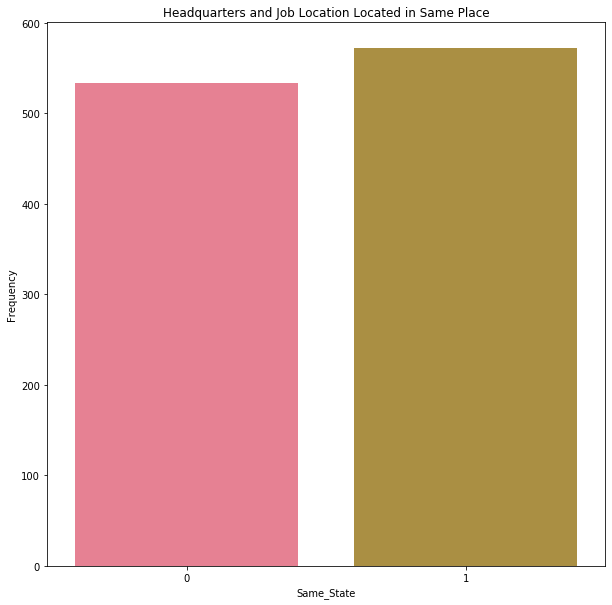

In [53]:
plt.figure(figsize = (10,10))
y = df['Same_State'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Same_State', ylabel = 'Frequency')
chart.set_title('Headquarters and Job Location Located in Same Place')
plt.show()

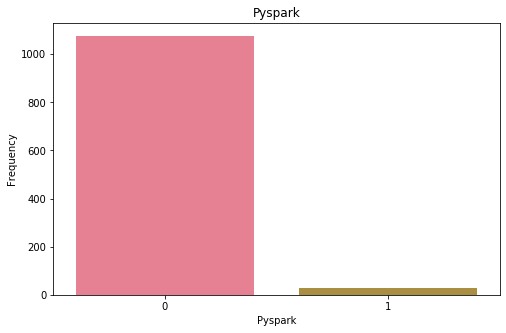

In [56]:
plt.figure(figsize = (8,5))
y = df['pyspark'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Pyspark', ylabel = 'Frequency')
chart.set_title('Pyspark')
plt.show()

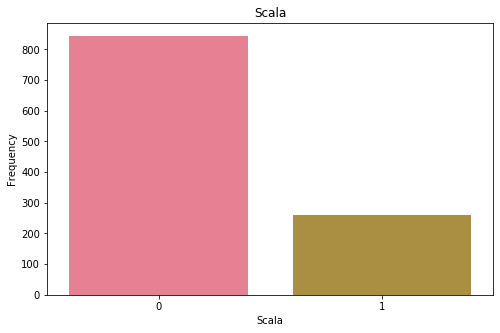

In [57]:
plt.figure(figsize = (8,5))
y = df['scala'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='Scala', ylabel = 'Frequency')
chart.set_title('Scala')
plt.show()

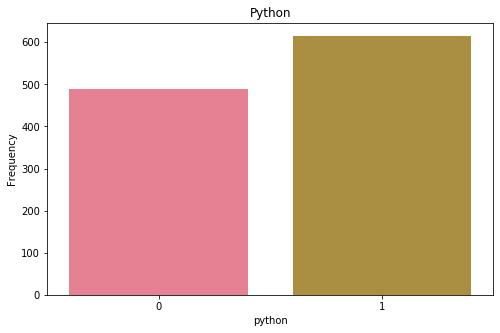

In [59]:
plt.figure(figsize = (8,5))
y = df['python'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='python', ylabel = 'Frequency')
chart.set_title('Python')
plt.show()

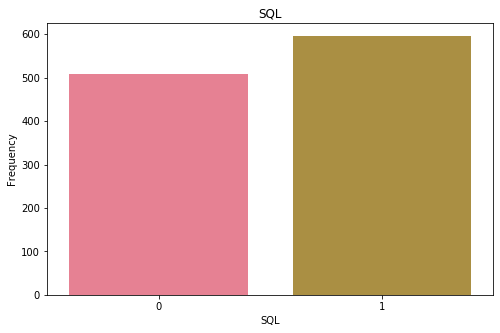

In [60]:
plt.figure(figsize = (8,5))
y = df['sql'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='SQL', ylabel = 'Frequency')
chart.set_title('SQL')
plt.show()

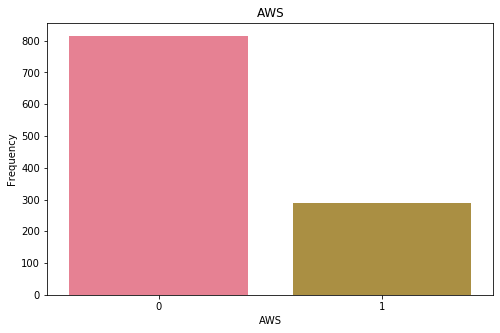

In [61]:
plt.figure(figsize = (8,5))
y = df['aws'].value_counts()
chart = sns.barplot(x=y.index, y=y)
chart.set(xlabel='AWS', ylabel = 'Frequency')
chart.set_title('AWS')
plt.show()

### Word Cloud

In [69]:
df = pd.read_csv('ds_glassdoor_jobs.csv3')

In [68]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [79]:
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

##### Data Science Job Description Word Clouds

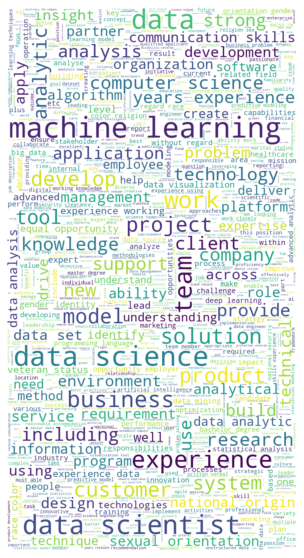

In [86]:
ds_words = ' '.join(df.loc[df['job_title']=='data scientist','Job Description'])
words_filtered = punctuation_stop(ds_words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 1000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

##### Data Engineer Job Description Word Clouds

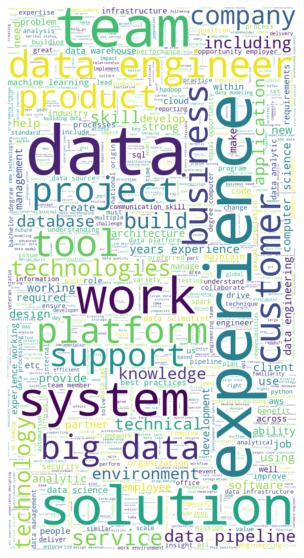

In [87]:
ds_words = ' '.join(df.loc[df['job_title']=='data engineer','Job Description'])
words_filtered = punctuation_stop(ds_words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 1000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

##### Machine Learning Engineer Job Description Word Clouds

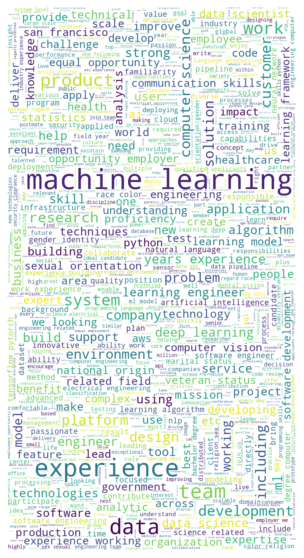

In [88]:
ds_words = ' '.join(df.loc[df['job_title']=='mle','Job Description'])
words_filtered = punctuation_stop(ds_words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 1000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

##### Data Analyst Job Description Word Clouds

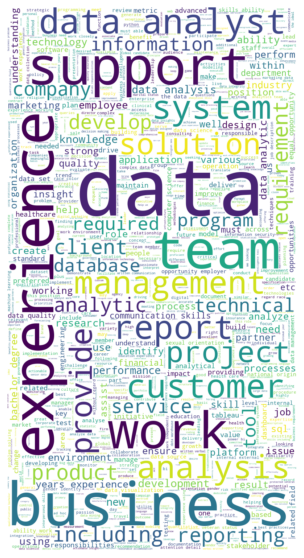

In [89]:
ds_words = ' '.join(df.loc[df['job_title']=='data analyst','Job Description'])
words_filtered = punctuation_stop(ds_words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 1000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [2270]:
df.to_csv('ds_glassdoor_jobs.csv4', index = False) #cleaned size, founded, type of ownership,sectore,revenue,seniority

In [2391]:
df.to_csv('cleaned_ds_glassdoor_jobs.csv', index = False)